<a href="https://colab.research.google.com/github/KaveeshBaddage/DataScienceImpl/blob/main/Tme_Series_Analysis_for_External_debt_in_Sri_Lanka_219315E_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install sodapy on Notebook which is a Python binding  the Socrata Open Data 

---

API**

---




**Import Data**



In [ ]:
import pandas as pd

totaldebt = {'Year': ['1970-01-01','1971-01-01','1972-01-01','1973-01-01','1974-01-01','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
        'DebtPercentage': [3.19979138278676,3.03363814679637,3.26536211368039,3.02989302192564,3.01920747046364,5.02448959446209,5.22714895591737,4.76307092927438,5.86561743403509,4.77777126234534,4.41988468398037,4.84080042598178,5.0943258867452,5.17646841723853,4.67765696116553,5.3900335603968,6.26275619676037,7.48183605947632,7.01233070633504,6.09844557229265,4.82495604505604,4.71925663369044,4.6796267405109,3.95191943303698,	3.56951001543452,3.5153880671421,3.40811271498683,3.56305419134132,3.76931116078052,4.9466178737263,4.94061177711766,4.80952401043364,4.36068066070834,3.26506862416402	,3.80369499113259,1.83042509064969,3.42592072210433,2.72530374019226,3.13217148624916,3.42232106189621,2.51004477556389,2.03428590438522,3.16079814903765,2.94706407208044,8.32698039918488,4.51847317419108,4.14312288022482,4.94772281639045,8.59663763483024,7.64804484383435]
        }

debtOverTheYears = pd.DataFrame.from_dict((totaldebt))

debtOverTheYears["Year"] = pd.to_datetime(debtOverTheYears["Year"])
#debtOverTheYears['Year'] = pd.DatetimeIndex(debtOverTheYears['Year']).year
print (debtOverTheYears.dtypes)
print (debtOverTheYears)

Year              datetime64[ns]
DebtPercentage           float64
dtype: object
         Year  DebtPercentage
0  1970-01-01        3.199791
1  1971-01-01        3.033638
2  1972-01-01        3.265362
3  1973-01-01        3.029893
4  1974-01-01        3.019207
5  1975-01-01        5.024490
6  1976-01-01        5.227149
7  1977-01-01        4.763071
8  1978-01-01        5.865617
9  1979-01-01        4.777771
10 1980-01-01        4.419885
11 1981-01-01        4.840800
12 1982-01-01        5.094326
13 1983-01-01        5.176468
14 1984-01-01        4.677657
15 1985-01-01        5.390034
16 1986-01-01        6.262756
17 1987-01-01        7.481836
18 1988-01-01        7.012331
19 1989-01-01        6.098446
20 1990-01-01        4.824956
21 1991-01-01        4.719257
22 1992-01-01        4.679627
23 1993-01-01        3.951919
24 1994-01-01        3.569510
25 1995-01-01        3.515388
26 1996-01-01        3.408113
27 1997-01-01        3.563054
28 1998-01-01        3.769311
29 1999-01-01       

**Print first 10 data rows and check how data are distributed into columns**

In [ ]:
print(len(debtOverTheYears))
debtOverTheYears.head(10)

50


,Year,DebtPercentage
0,1970-01-01,3.199791
1,1971-01-01,3.033638
2,1972-01-01,3.265362
3,1973-01-01,3.029893
4,1974-01-01,3.019207
5,1975-01-01,5.024490
6,1976-01-01,5.227149
7,1977-01-01,4.763071
8,1978-01-01,5.865617
9,1979-01-01,4.777771


**Select columns from the data set**

**Select dependent and independent variables**

In [ ]:
Year = debtOverTheYears['Year'].values
DebtPercentage = debtOverTheYears['DebtPercentage'].values

**Define a function to plot a graph**

In [ ]:

import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='Year', ylabel='Total debt service (% of GNI) - Sri Lanka', dpi=100):
  plt.figure(figsize=(26,5), dpi=dpi)
  plt.plot(x, y, color='tab:red')
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.show()

**Plot the graph**

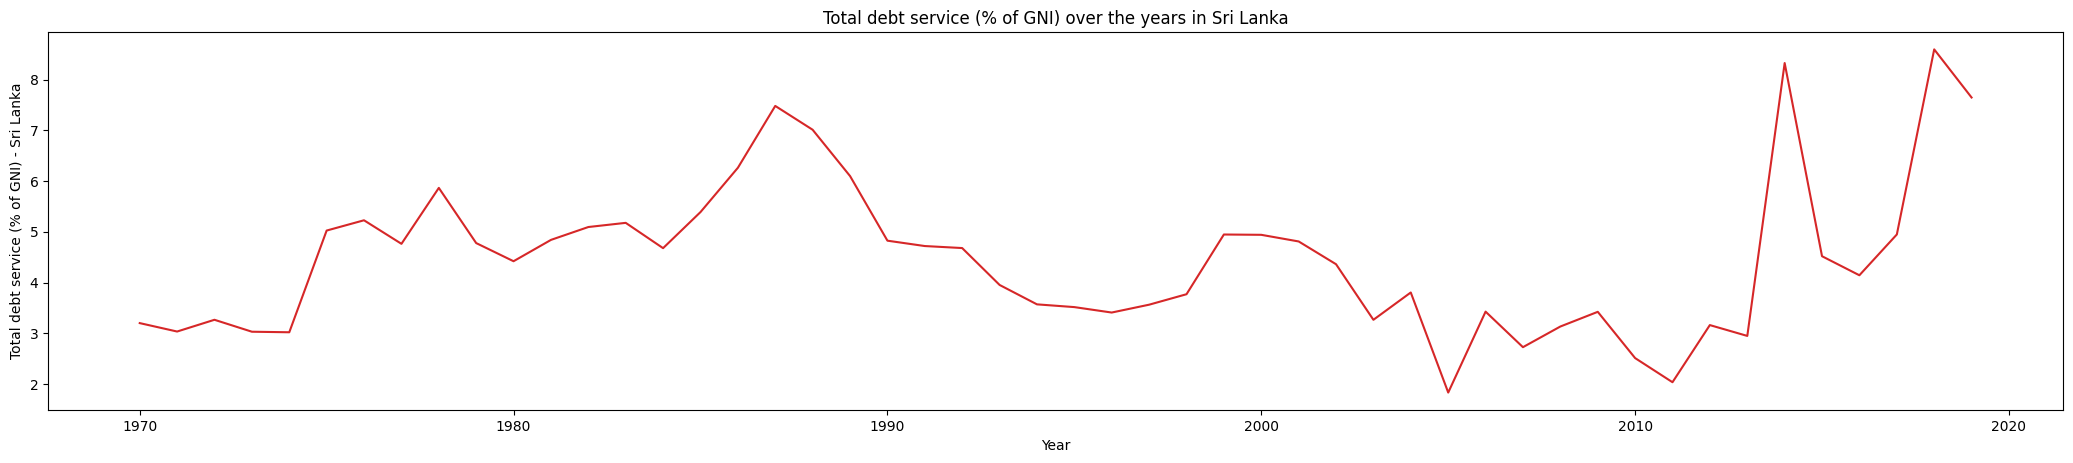

In [ ]:
plot_df(debtOverTheYears, x=Year, y=DebtPercentage, title='Total debt service (% of GNI) over the years in Sri Lanka')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(debtOverTheYears)
fig = result.plot()

AttributeError: ignored

In [ ]:
from fbprophet import Prophet
from pandas import to_datetime
model = Prophet()
#train_df = debtOverTheYears.reset_index()
train_df = debtOverTheYears.rename(columns={'Year':'ds','DebtPercentage':'y'})
#train_df["ds"] = to_datetime(train_df.Year)
#train_df["ds"] = train_df.Year
print(train_df.tail(10))
model.fit(train_df)

Make dataframe with future years for forecasting

In [ ]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(periods=10, freq='y', include_history=True)
#make predictions for each row in the future dataframe
forecast = model.predict(future)
fig1 = model.plot(forecast)

In [ ]:
fig2 = model.plot_components(forecast)